# More challenging calculation

In [1]:
# Import preliminaries and connect to CPS database
import pandas as pd
import numpy as np
import sqlite3
import itertools

# Connect to database containing monthly CPS data files
conn = sqlite3.connect('data/cps.db')

In [2]:
def contrib_calc(filters, measure='lfpr'):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""
    data = pd.DataFrame()
    vars_vals = [('PREMPNOT', [1, 2, 3, 4])]
    ages = [(25, 34), (35, 44), (45, 54)]
    sex = [('men', 1), ('women', 2)]
    ser = 'PREMPNOT, PWCMPWGT, HRMONTH, PRTAGE, PESEX'
    wc = 10000000.0   # Monthly weight in thousands of people
    for y in range(1998, 2019):    # Test small
        ex = f"select {ser} from cps_{y} {filters}"
        df = pd.read_sql(ex, conn)
        mos = list(df['HRMONTH'].unique())
        for arg in itertools.product(mos, vars_vals, ages, sex):
            col_name = (f'Unemployed {arg[3][0]}, {arg[2][0]}-'
                        f'{arg[2][1]} years old, in thousands')
            dft = df[(df['HRMONTH'] == arg[0]) & 
                     (df['PRTAGE'].between(arg[2][0], arg[2][1])) & 
                     (df['PESEX'] == arg[3][1])]
            r = np.where(dft[arg[1][0]].isin(arg[1][1]), 1, 0)
            date = pd.to_datetime(f'{y}-{arg[0]}-01')
            data.at[date, col_name] = (r * dft['PWCMPWGT']).sum() / wc
    return data.sort_index()

In [24]:
def contrib_calc(filters, measure='lfpr'):
    """Calculate NILF categories' contribution to group change 
       in labor force measures (lfpr, epop) since 2000."""
    data = pd.DataFrame()
    ser = 'PREMPNOT, PWCMPWGT, HRMONTH'   # Need to add the rest
    for y in range(1998, 2019):    # Test small
        ex = f"select {ser} from cps_{y} {filters}"
        df = pd.read_sql(ex, conn)
        wgt = df['PWCMPWGT']
        wc = float(max(df['HRMONTH'].unique()) * 10000000)
        vars_vals = [('PREMPNOT', [2])]
        for var, val in vars_vals:
            r = (np.where(df[var].isin(val), 1, 0) * wgt).sum()
            data.at[y, var] = r / wc
    return data

In [60]:
ser = 'PREMPNOT, PWCMPWGT, HRMONTH, PRTAGE, PESEX'
filters = "where (PRTAGE between 25 and 54) and (HRMONTH = 1)"
ex = f"select * from cps_2012 {filters}"
df = pd.read_sql(ex, conn)

In [61]:
len(df)

105624

In [62]:
len(df.drop_duplicates())

52812

In [26]:
mos = list(df['HRMONTH'].unique())
vars_vals = [('PREMPNOT', [2])]
ages = [(25, 34), (35, 44), (45, 54)]
sex = [('men', 1), ('women', 2)]

In [28]:
data = pd.DataFrame()
for arg in itertools.product(mos, vars_vals, ages, sex):
    col_name = (f'Unemployed {arg[3][0]},'
               f'{arg[2][0]}-{arg[2][1]} years old')
    dft = df[(df['HRMONTH'] == arg[0]) & 
             (df['PRTAGE'].between(arg[2][0], arg[2][1])) & 
             (df['PESEX'] == arg[3][1])]
    r = np.where(dft[arg[1][0]].isin(arg[1][1]), 1, 0)
    date = pd.to_datetime(f'{y}-{arg[0]-01}')
    data.at[date, col_name] = (r * dft['PWCMPWGT']).sum()

In [29]:
data

,"Unemployed men,25-34 years old","Unemployed women,25-34 years old","Unemployed men,35-44 years old","Unemployed women,35-44 years old","Unemployed men,45-54 years old","Unemployed women,45-54 years old"
4,8.056972e+09,6.601496e+09,5.767750e+09,5.507696e+09,5.049339e+09,5.901685e+09
8,9.054188e+09,8.884776e+09,5.381036e+09,5.809754e+09,5.995326e+09,6.445021e+09
12,8.538670e+09,7.026306e+09,5.036028e+09,4.984999e+09,5.255029e+09,3.862336e+09
2,1.095765e+10,7.382540e+09,7.668768e+09,6.996779e+09,6.044865e+09,5.601143e+09
1,1.105770e+10,8.221010e+09,7.949969e+09,6.463503e+09,6.492502e+09,5.756339e+09
7,8.358878e+09,8.608023e+09,5.838103e+09,6.081634e+09,5.459280e+09,5.650791e+09
6,8.236214e+09,7.346190e+09,5.087708e+09,5.377537e+09,5.270400e+09,6.095431e+09
3,1.006108e+10,6.759467e+09,7.309053e+09,6.163497e+09,6.039249e+09,5.262363e+09
5,8.630984e+09,8.016194e+09,5.033417e+09,5.232076e+09,5.018626e+09,5.188379e+09
11,7.549298e+09,7.334412e+09,4.599560e+09,5.181513e+09,4.443561e+09,4.076176e+09


In [3]:
filters = "where (PRTAGE between 25 and 54)"
data = contrib_calc(filters)
data

,"Unemployed men, 25-34 years old, in thousands","Unemployed women, 25-34 years old, in thousands","Unemployed men, 35-44 years old, in thousands","Unemployed women, 35-44 years old, in thousands","Unemployed men, 45-54 years old, in thousands","Unemployed women, 45-54 years old, in thousands"
1998-01-01,19227.524584,19825.275882,21755.583784,22399.158122,16567.208302,17427.057950
1998-02-01,19234.288476,19817.061860,21782.865120,22374.691703,16576.791189,17460.306389
1998-03-01,19223.493589,19788.492463,21805.307043,22380.861245,16579.117513,17440.627777
1998-04-01,19229.853883,19724.315525,21798.533425,22396.047767,16686.312758,17494.361739
1998-05-01,19127.031524,19723.399260,21872.381557,22426.020140,16775.278141,17559.369477
1998-06-01,19080.914957,19678.897934,21882.748848,22462.544080,16780.454655,17541.664418
1998-07-01,19048.589301,19674.238329,21914.273906,22445.458905,16772.543073,17519.490497
1998-08-01,18995.266151,19658.103763,21932.890882,22500.026289,16800.400405,17600.470237
1998-09-01,19026.793802,19645.084273,21855.801135,22465.936533,16852.107817,17665.693910
1998-10-01,19003.054676,19573.386052,21918.066027,22452.569724,16897.808615,17751.303836


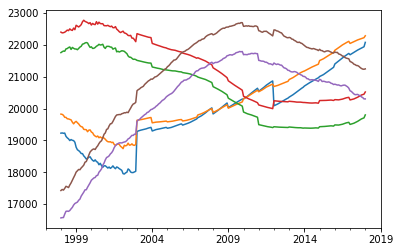

In [5]:
%matplotlib inline
data.plot(legend=False)

In [10]:
data.iloc[167:]

,"Unemployed men, 25-34 years old, in thousands","Unemployed women, 25-34 years old, in thousands","Unemployed men, 35-44 years old, in thousands","Unemployed women, 35-44 years old, in thousands","Unemployed men, 45-54 years old, in thousands","Unemployed women, 45-54 years old, in thousands"
2011-12-01,20865.771997,20765.595005,19402.973001,19995.669002,21370.047107,22280.107354
2012-01-01,20087.127003,20692.199995,19428.659994,20244.575010,21429.474915,22468.562369
2012-02-01,20105.817998,20703.464004,19424.843003,20239.689000,21401.299219,22463.544141
2012-03-01,20124.447999,20714.682001,19421.073999,20234.839993,21383.254044,22439.071737
2012-04-01,20144.248998,20726.765003,19418.356996,20230.786005,21398.521935,22431.380286
2012-05-01,20167.615993,20743.333999,19416.336005,20227.977004,21385.254203,22407.438306
2012-06-01,20191.647003,20760.652999,19414.926997,20225.887998,21363.768081,22386.071234
2012-07-01,20216.419000,20778.681991,19414.220001,20224.496010,21361.813334,22372.143672
2012-08-01,20239.644003,20794.362005,19413.085994,20222.754001,21314.556163,22317.354870
2012-09-01,20262.523991,20809.580002,19411.614993,20220.576993,21275.932622,22270.642067
